#Import Module

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# set option untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Dataset/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

terdapat dtypes: float64(3), int64(35), object(43)

In [ ]:
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df_train = df_train.drop(['Id','PoolQC','MiscFeature','Fence','FireplaceQu','Alley','LotFrontage'],axis=1)
# Menghapus kolom yang memiliki terlalu banyak null value dan juga kolom "Id" karena tidak diperlukan


In [ ]:
# Handle missing values
df_train.fillna(df_train.mean(), inplace=True)

In [ ]:
df_train = df_train.dropna()
# Menghapus baris yang memiliki null Values

In [ ]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [ ]:
df_train.shape

# dari (1460, 81) menjadi (1338, 74) kolom dan baris

(1338, 74)

In [ ]:
# Outlier Handling
# menghitung IQR
Q1 = df_train['SalePrice'].quantile(0.25)
Q3 = df_train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# menghapus outlier
df_train = df_train[(df_train['SalePrice'] >= Q1 - 1.5*IQR) & (df_train['SalePrice'] <= Q3 + 1.5*IQR)]

In [ ]:
df_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,56.743370,10330.863495,6.108424,5.613885,1971.908736,1984.887676,96.680187,438.570983,50.167707,574.641186,1063.379875,1145.238690,348.098284,3.960218,1497.297192,0.424337,0.061622,1.552262,0.391576,2.861934,1.031201,6.450858,0.620905,1977.596724,1.826053,488.471919,95.071763,46.241810,21.779251,3.386115,15.969579,2.709048,44.808112,6.328393,2007.806552,176086.351794
std,41.715072,8594.808723,1.226792,1.081342,29.386550,20.321034,164.197266,431.805033,167.520945,426.308264,370.816139,356.755121,425.781249,38.438419,475.185451,0.511507,0.243786,0.535251,0.502476,0.764433,0.178361,1.501860,0.636981,24.699956,0.605859,176.588465,124.085386,64.999063,61.338076,29.410920,57.010975,39.992393,518.961506,2.696565,1.331192,58502.553213
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,7591.500000,5.000000,5.000000,1955.000000,1967.000000,0.000000,0.000000,0.000000,245.250000,816.000000,888.000000,0.000000,0.000000,1144.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.000000
50%,50.000000,9501.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,399.500000,0.000000,489.000000,998.500000,1083.500000,0.000000,0.000000,1458.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,70.000000,11451.500000,7.000000,6.000000,2000.000000,2003.000000,160.000000,700.000000,0.000000,813.750000,1272.500000,1362.000000,729.000000,0.000000,1738.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.750000,2.000000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,210000.000000
max,190.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,2042.000000,6110.000000,4692.000000,1818.000000,528.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,345000.000000


#Distribusi Harga Rumah

In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


count      1282.000000
mean     176086.351794
std       58502.553213
min       35311.000000
25%      134000.000000
50%      165000.000000
75%      210000.000000
max      345000.000000
Name: SalePrice, dtype: float64


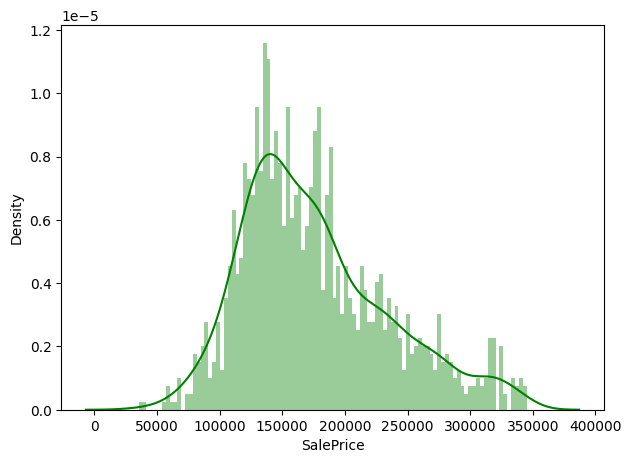

In [ ]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(7, 5))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Text(0, 0.5, 'LotArea')

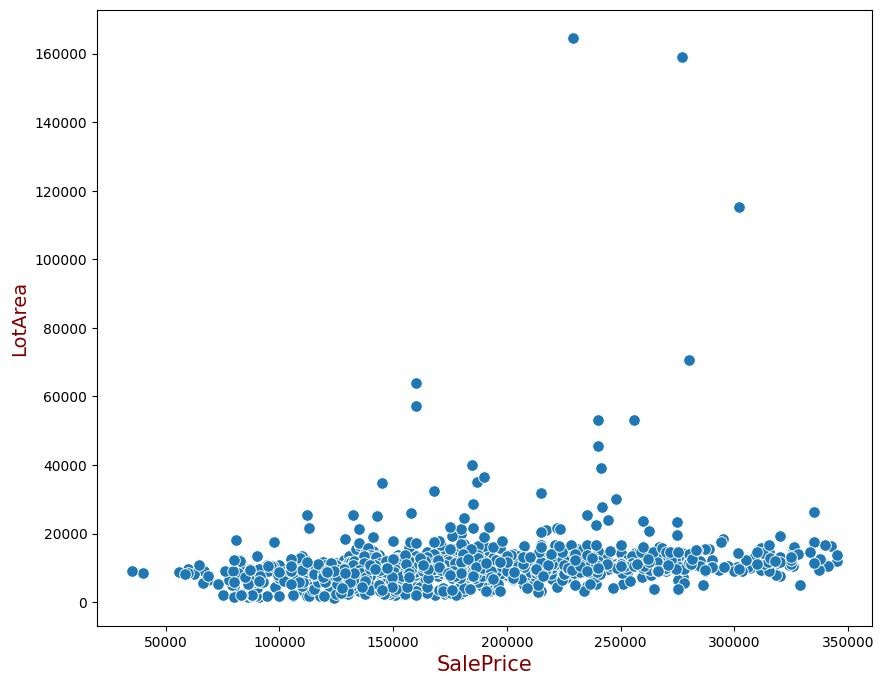

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='SalePrice', y='LotArea', data=df_train, s=70)

title = 'SalePrice and LotArea'

ax.set_xlabel('SalePrice', fontsize=15, color='#800000')
ax.set_ylabel('LotArea', fontsize=14, color='#800000')

#Linear Regression

In [ ]:
data = df_train[['LotArea','SalePrice']]
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [ ]:
data.columns = ['x','y']
data.head()

,x,y
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [ ]:
data['(x-x_mean)'] = round(data['x'] - data['x'].mean(),2)
data['(y-y_mean)'] = round(data['y'] - data['y'].mean(),2)
data['(x-x_mean)(y-y_mean)'] = data['(x-x_mean)'] * data['(y-y_mean)']
data['pow((x-x_mean),2)'] = round(pow(data['x'] - data['x'].mean(),2),2)
data.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)"
0,8450,208500,-1880.86,32413.65,-6.096554e+07,3537647.49
1,9600,181500,-730.86,5413.65,-3.956620e+06,534161.45
2,11250,223500,919.14,47413.65,4.357978e+07,844811.92
3,9550,140000,-780.86,-36086.35,2.817839e+07,609747.80
4,14260,250000,3929.14,73913.65,2.904171e+08,15438113.68


In [ ]:
# koefisien regresi (slope)
b1 = data['(x-x_mean)(y-y_mean)'].sum() / data['pow((x-x_mean),2)'].sum()
print('koefisien regresi',b1)

koefisien regresi 1.618993392691462


In [ ]:
#  nilai intercept
b0 = data['y'].mean() - b1 * data['x'].mean()
print(' nilai intercept',b0)

 nilai intercept 159360.75205561443


In [ ]:
# regresi linear sederhana
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
textstr


'y = 159360.75205561443 + 1.618993392691462 * x'

In [ ]:
df_train['SalePrice'].describe()

count      1282.000000
mean     176086.351794
std       58502.553213
min       35311.000000
25%      134000.000000
50%      165000.000000
75%      210000.000000
max      345000.000000
Name: SalePrice, dtype: float64

In [ ]:
data['y_pred'] = b0 + b1*data['x']
data.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)",y_pred
0,8450,208500,-1880.86,32413.65,-6.096554e+07,3537647.49,173041.246224
1,9600,181500,-730.86,5413.65,-3.956620e+06,534161.45,174903.088625
2,11250,223500,919.14,47413.65,4.357978e+07,844811.92,177574.427723
3,9550,140000,-780.86,-36086.35,2.817839e+07,609747.80,174822.138956
4,14260,250000,3929.14,73913.65,2.904171e+08,15438113.68,182447.597835


#Linear Regression sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

x = data.x.values.reshape(-1,1)
y = data.y.values.reshape(-1,1)

model = LinearRegression().fit(x, y)

b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  159360.752
slope (b1) :  1.619
 
y = 159360.752 + 1.619 * x


In [ ]:
y[0:3]

array([[208500],
       [181500],
       [223500]])

In [ ]:
y_pred = model.predict(x)
y_pred[0:3]

array([[173041.24622386],
       [174903.08862545],
       [177574.42772339]])

In [ ]:
from sklearn.metrics import r2_score

print('R-squared for training data is {}'.format(r2_score(y_pred, y)))

R-squared for training data is -15.676124672987054


In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_pred, y))))

RMSE for testing data is 56801.448547896965


In [ ]:
from sklearn.metrics import mean_absolute_error

print('MAE for training data is {}'.format(mean_absolute_error(y_pred, y)))

MAE for training data is 44980.45281104872


In [ ]:
df_train['SalePrice'].describe()

count      1282.000000
mean     176086.351794
std       58502.553213
min       35311.000000
25%      134000.000000
50%      165000.000000
75%      210000.000000
max      345000.000000
Name: SalePrice, dtype: float64

In [ ]:
# MAE dalam memprediksi itu error +- 44980

# prediksi 176086 -> 131106 atau 221066
# acceptable menurut atasan? tidak
# deploy , re-modeling (yes)

In [ ]:
df_train =  pd.get_dummies(df_train, drop_first=True)
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [ ]:
data = df_train.drop(['SalePrice'], 1)
target = df_train[['SalePrice']]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data
Y = target
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.2, random_state= 0)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(train_X, train_y)
linregpred = linreg.predict(test_X)

In [ ]:
# MAE
mean_absolute_error(test_y, linreg.predict(test_X))

15992.756650080633

In [ ]:
# MSE
mean_squared_error(test_y, linreg.predict(test_X))

1535797947.4444942

In [ ]:
# RMSE
mean_squared_error(test_y, linreg.predict(test_X), squared=False)

39189.258061929344

In [ ]:
# R2
r2_score(test_y, linreg.predict(test_X))

0.49217468129094777

In [ ]:
# MAE dalam memprediksi itu error +- 15992

# prediksi 176086 -> 160094 atau 192078
# acceptable menurut atasan? tidak
# deploy , re-modeling (yes)

In [ ]:
y[0:3]

array([[208500],
       [181500],
       [223500]])

# Tugas 2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [ ]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [ ]:
df.drop(['CustomerID'],axis=1)

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


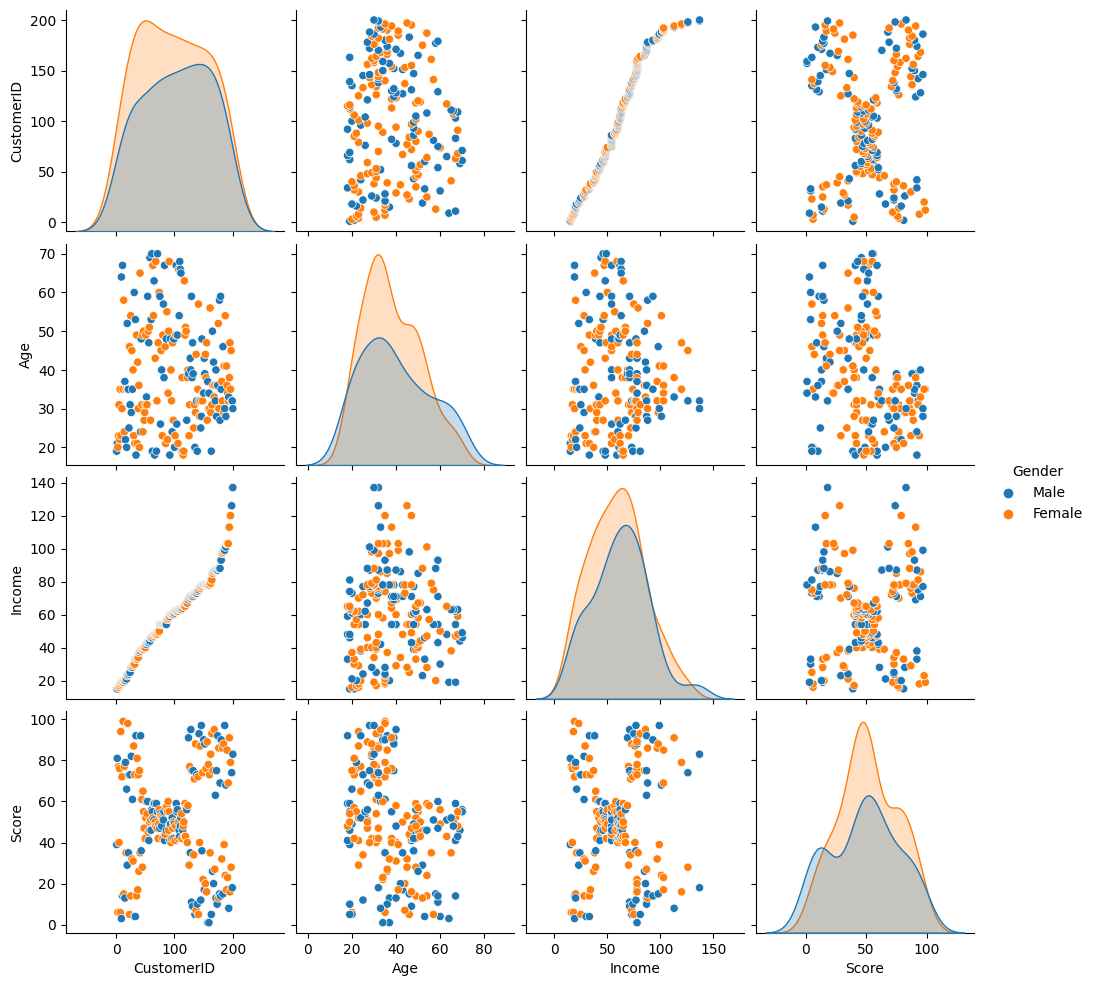

In [ ]:
X = df.drop(['Gender'], axis=1)
sns.pairplot(data=df, hue='Gender')
plt.show()

<Axes: >

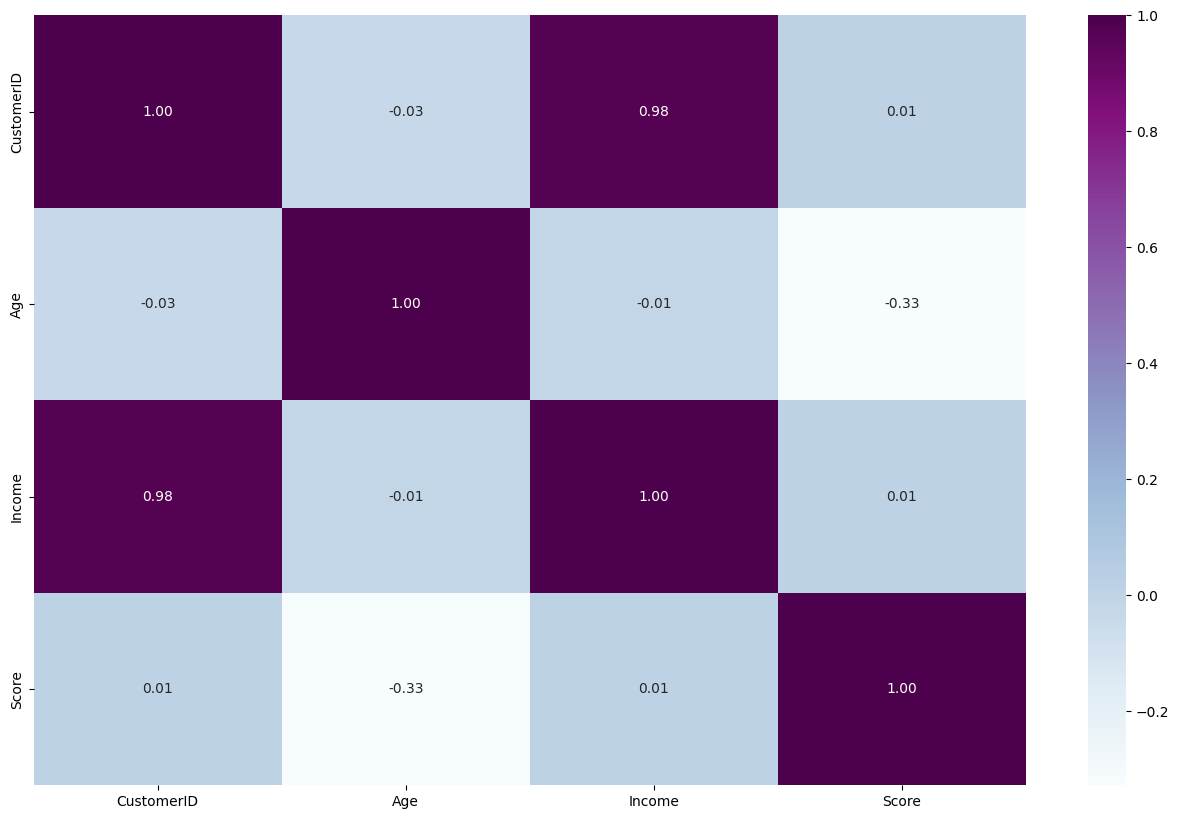

In [ ]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

## Clustring Model

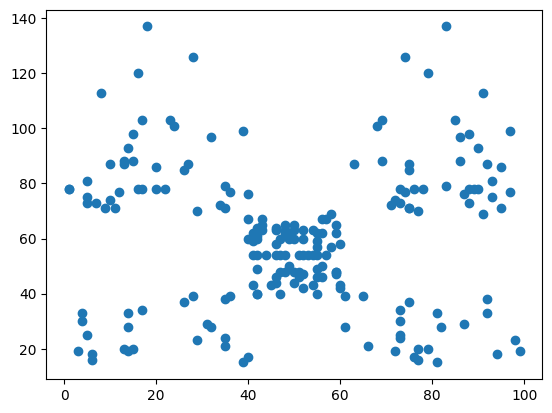

In [ ]:
plt.scatter(x= df['Score'], y= df['Income'])

In [ ]:
from sklearn.cluster import KMeans

dist=[]
K= range(1,10)

for i in K:
  kmean=KMeans(n_clusters=i)
  kmean.fit(df[['Score','Income']])
  dist.append(kmean.inertia_)

<Figure size 1600x800 with 0 Axes>

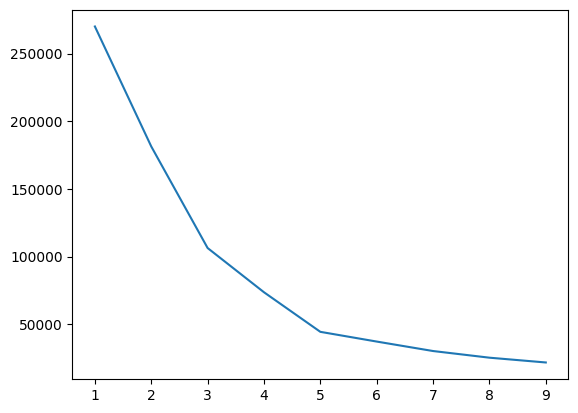

<Figure size 1600x800 with 0 Axes>

In [ ]:
plt.plot(K,dist)
plt.figure(figsize=(16,8))

Elbow point antara 3 atau 5, disini saya menggunakan 5

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

cluster = kmeans.fit_predict(df[['Score','Income']])
cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
df['Cluster']= cluster
df.head()

,CustomerID,Gender,Age,Income,Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


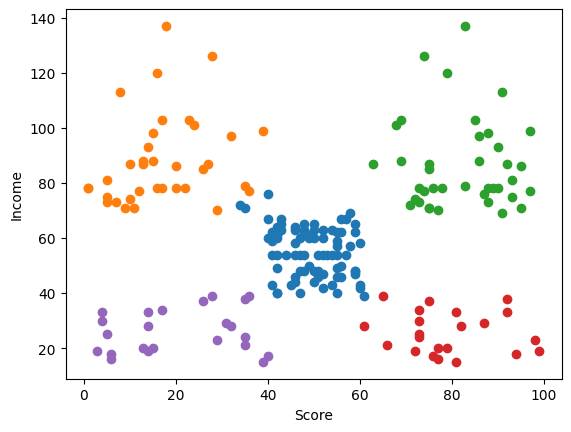

In [ ]:
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]
df4=df[df['Cluster']==3]
df5=df[df['Cluster']==4]

plt.scatter(df1['Score'],df1['Income'])
plt.scatter(df2['Score'],df2['Income'])
plt.scatter(df3['Score'],df3['Income'])
plt.scatter(df4['Score'],df4['Income'])
plt.scatter(df5['Score'],df5['Income'])

plt.xlabel('Score')
plt.ylabel('Income')

plt.show()

<Axes: xlabel='Cluster', ylabel='count'>

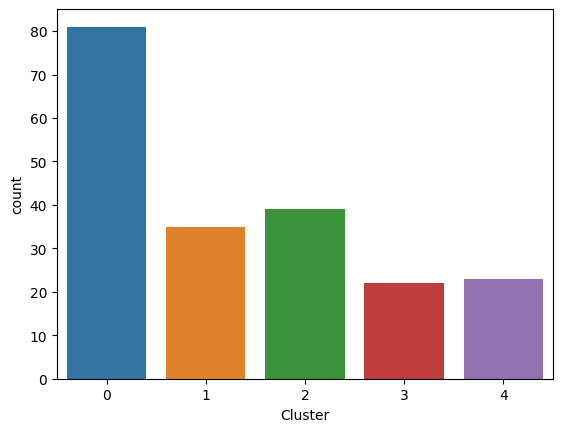

In [ ]:
sns.countplot(data=df,x="Cluster")

##Evaluation Metrics

In [ ]:
display(df.groupby('Cluster').agg(['mean','median']))

CustomerID               Age            Income             Score  \
               mean median       mean median       mean median       mean   
Cluster                                                                     
0         86.320988   86.0  42.716049   46.0  55.296296   54.0  49.518519   
1        164.371429  165.0  41.114286   42.0  88.200000   85.0  17.114286   
2        162.000000  162.0  32.692308   32.0  86.538462   79.0  82.128205   
3         23.090909   23.0  25.272727   23.5  25.727273   24.5  79.363636   
4         23.000000   23.0  45.217391   46.0  26.304348   25.0  20.913043   

                
        median  
Cluster         
0         50.0  
1         16.0  
2         83.0  
3         77.0  
4         17.0